# FYS1120 Computational Essay
# Could we use the concept of a rail gun to make a Space Elevator?
## Written by Oskar Hafstad, November 2019.
***

# Introduction: What is a space elevator?
(Illustration from [Wikipedia](https://en.wikipedia.org/wiki/Space_elevator))

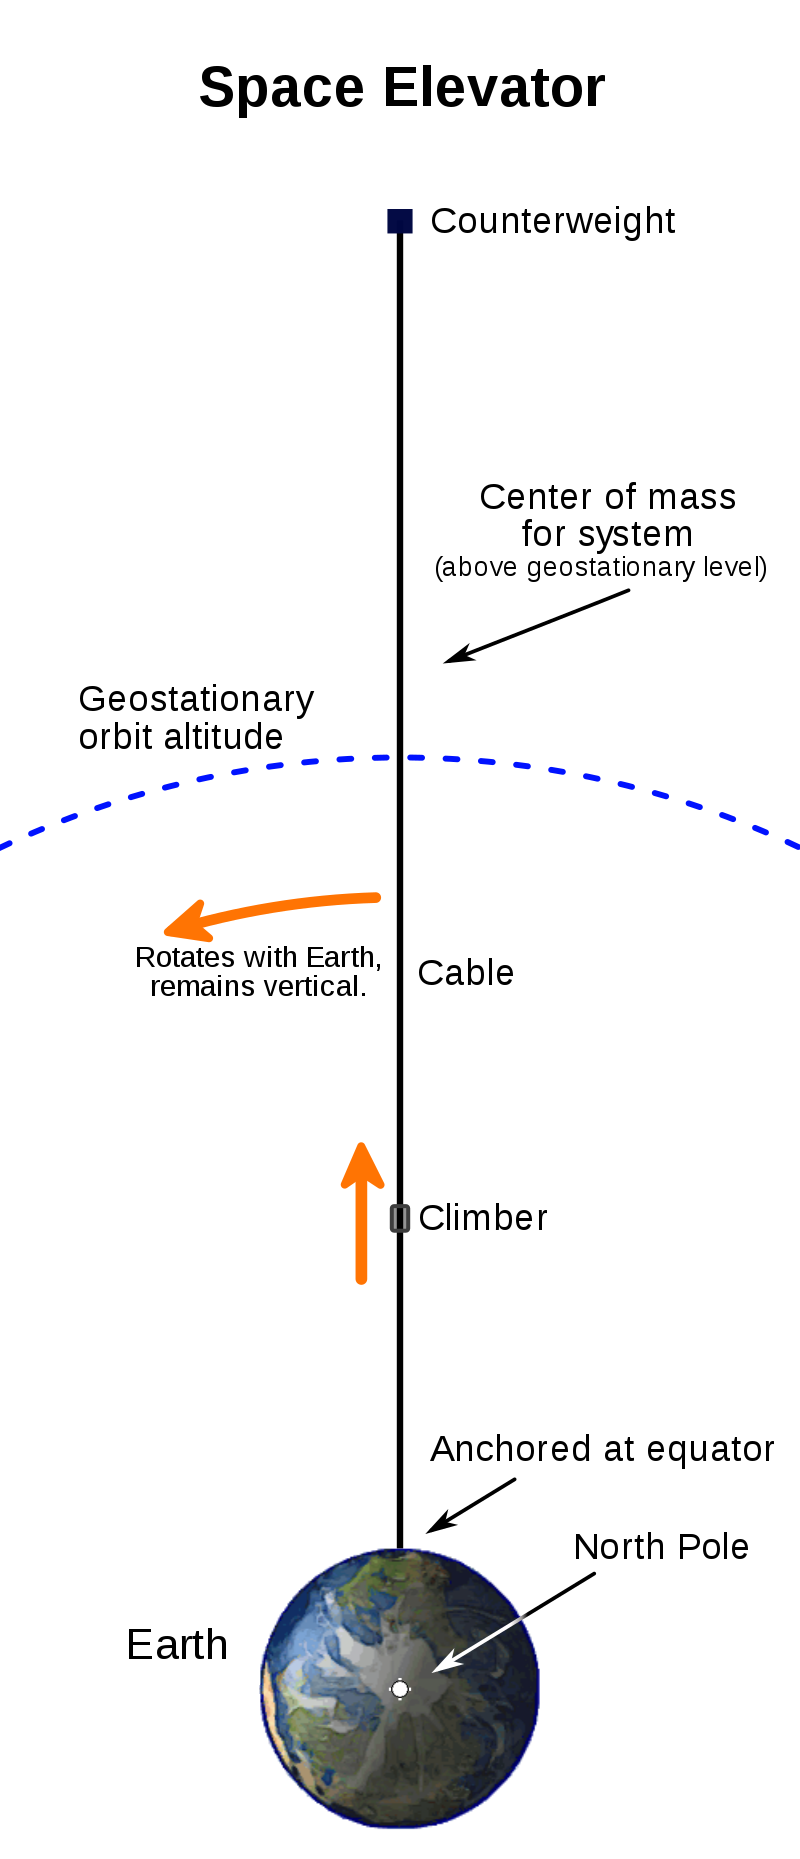

A space elevator is a proposed alternative ground to space transportation method that can run on electricity as opposed to today's space rockets. The system consists of an anchor situated at the equator to match the rotational axis of our planet, a cable that we can move along and a counterweight to keep the cable taut. The counterweight would have to be located above a Geostationary orbit(GEO) to keep the cable tight as above that point the centrifugal force from rotating with the planet over comes the gravitational one pulling the cable taut. GEO for Earth is at about $\color{red}{\text{35,786 km}}$. At GEO the net force on a object on the cable would be zero so this will be my desination height. For this problem I will not look into the details of the system as a whole but rather focus on the cable which is what will be most relevant for our rail gun space elevator. One of the biggets issues with constructing a space elevator is the sheer forces the cable would experiense, most materials we know of don't have a great enough tensile strength and would simply snap, there is one candidate however.

## Carbon nanotubes
![](https://upload.wikimedia.org/wikipedia/commons/7/76/Kohlenstoffnanoroehre_Animation.gif)
(Illustration from [Wikipedia](https://science.howstuffworks.com/rail-gun1.htm))

Not only are they the strongest material currently known, multi-walled ones are reported to have a tensile strength of 63 gigapascals. This equates to being able to withstand 62,980 N(6,422kg) on a cable with a 1mm cross-section[(1)](https://science.sciencemag.org/content/287/5453/637). Although debated, but not only this it is both theorized and reported that the material can exhibit superconducting characteristics[(2)](https://science.sciencemag.org/content/292/5526/2462). For this simulation I will make the assumption that we are dealing with a superconducting carbon nanotube cable, which will help greatly not having to deal with the resistance of such an extremly long circuit that we'll make.

# Rail gun and the acceleration of the elevator
![](https://cdn.hswstatic.com/gif/railgun-7.gif)
(Illustration from [HowStuffWorks](https://science.howstuffworks.com/rail-gun1.htm))

In a rail gun you have two rails(in our case cables) with a current connected by a conductive bar which makes it a closed circuit. This current will generate a magnetic field as illustrated above, we assume the cables to be infinitly long so the B-field from the two cables we can get from the expression: $B_{cable} = \frac{\mu_0}{2\pi}\frac{I}{r}$. With the charges moving in the current interacting with the B-field we will get a Lorentz Force acting on them in the connecting bar, this we can express as $$d\vec{F} = \vec{I}d\vec{l}\times\vec{B}$$ (dropping vector notation) $$F = \int_{\frac{r}{2}}^{L+\frac{r}{2}}IBdl$$
The cables have a radius r and are seperated by a length L, the integration limits come from taking into concideration the symmetry of the B-field the two cables set up so we integrate from the middle of them. We then replace B with the earlier expression for B from the cables and integrate dl over the limits we get: $$\frac{\mu_0}{2 \pi}I^2\int_{\frac{w}{2}}^{L+\frac{r}{2}}\frac{1}{r}dl = \frac{\mu_0}{2 \pi}I^2 \big(\ln(L+\frac{r}{2})-\ln(\frac{r}{2})\big)$$ 

This gives us the force from one cable so we simply times it by two. Other than this force I will only take gravitational forces into concideration.

# First case: Building one on the Moon
For many roadmaps developing a functional space elevator many propose to make one on the moon first, there you would have less gravity to work against, no air-resistance and safer in case something would go wrong(f.ex cable breaking). At first I imagined we would have the space elevator go to the moon's equvalent of GEO but that was not as straight forward as thought. As it appears trying to calculate a GEO for the moon it's gravity is so weak that it would be outside the moon's Hill Sphere. To arrive at this we first look at the radius of a GEO for the moon, we know that the moon takes about $27.3$ days to rotate around its axis we can then use the formula for orbital period: $$ T = 2\pi\sqrt{\frac{a^3}{G(M_{moon} + M_2)}} $$
Where T is the orbital period, a: semi-major axis, G: gravitational constant and M_ the masses. We will for assume the moon to have a circular orbit so a = r(radius of orbit) and that $M_{moon} \gg M_2$, we then get: $$ T = 2\pi\sqrt{\frac{r^3}{GM_{moon}}} $$ We then isolate for r and find an orbital radius of about $88,441 km$, this is less than the Moon's hill sphere with a radius of about $\approx 66,100km$. The Hill sphere, is the sphere with radius r within which an object is the dominant gravitational object. So in conclution the moon has no such thing as a stable GEO we can make use of. 

But we are in luck because of two facts, in celectial mechanics there are what are known as Lagrange points and the second fact that the moon is Tidaly locked to our planet.

### Lagrange points
Are points near two large bodies in orbit where a smaller object will maintain its position relative to the large orbiting bodies. All two-body systems have five such points. See illustartions below. The one of interest to us is the L2 point in the Earth/Moon system. You can think of it as a stable sadle point in the gravitational field.
(Illustration from [Wikipedia](https://en.wikipedia.org/wiki/Lagrangian_point))
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Lagrange_points2.svg/1024px-Lagrange_points2.svg.png' style="height:400px"/>

### Tidal locking
Or gravitational locking as it's known is when one astronomical object orbiting another always has the same face toward the one it is orbiting during its whole orbit. This occurs over time as the gravitational interaction between the objects will cause tidal effects that will slow the rotation until it is gravitationaly locked. The image below illustrates this well. (Illustrations from [Wikipedia](https://en.wikipedia.org/wiki/Tidal_locking)) <img src='https://upload.wikimedia.org/wikipedia/commons/0/04/MoonTorque.jpg' style="height:200px"/>

This is the case with the moon and the Earth, so for the Earth/Moon system Lagrange point 2 will also be geosynchronous. Thus L2 will be the ideal destination height for our moon space elevator. L2 is also a proposed location for a lunar refueling station as a pitstop for deep-space missons. So our space elevator will probably be pretty busy transporting fuel extracted from the lunar soil as soon as it's operational.

![](https://upload.wikimedia.org/wikipedia/commons/5/56/Tidal_locking_of_the_Moon_with_the_Earth.gif)

So in some sense Pink Floyd got it wrong, there ain't no such thing as the dark side of the moon...

# Simulation code
First we import the necessarry modules:
- scipy.constants for certain constants
- numpy for some math functions and working with arrays
- matplotlib.pyplot for plotting our results
- datetime for converting the time it takes to reach destination

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import scipy.constants as constants
import numpy as np
import datetime

I have chosen to write the code object oriented to make it easy to manipulate parameters and have easy access to variables within the class. First we have our constructor setting up needed parameters.

In [ ]:
class SpaceElevator:
    """ Class representing a space elevator on the moon or on the earth. """

    def __init__(self, x0=1, L=1.4, r_cable=0.05, m=1, dt=0.01, moon=False):
        self.x0 = x0  # initial position above surface [m]
        self.L = L  # distance between cables [m]
        self.r0 = 6371000  # radius of earth [m]
        self.m_E = 5.972e24  # mass of earth [kg]
        self.m_M = 7.348e22  # mass of moon [kg]
        self.r_cable = r_cable  # radius of cables [m]
        self.GEO = 35786000  # radius of Earth GEO orbit [m]
        self.moon_surface_E = 386139100  # moon opposite surface dist from Earth center [m]
        self.moon_surface_M = 1737100  # radius of moon
        self.L2_E = 448900000  # Earth/Moon L2 position from Earth center
        self.L2_M = self.L2_E - self.moon_surface_E
        self.G = constants.G  # Newtonian constant of gravitation
        self.mu0 = constants.mu_0  # Magnetic premeability vacuum
        self.moon = moon  # Check to calculate for elevator on moon
        self.ln = np.log(L+(r_cable/2))-np.log(r_cable/2)  # for shortening expressions

        # time parameters
        self.dt = dt
        self.t = [0]

        self.m = m  # mass of cargo [kg]
        self.x = [x0]  # list for position values
        self.v = [0]  # list for velocity values
        self.I_list = []  # list for current values
        self.a = [(self.LorentzForce(self.x[0]) + self.Gravity(self.x[0])) /
                  self.m]  # list for acceleration values

Then we set up our function for the gravity affecting the elevator, for the moon I have added the pull from the earth as well, this is as the pull of the moon is so weak that the simulation takes much longer to run, even though the earth's pull so far away is on the order of $\approx0.02m/s^2$ everything helps.

In [ ]:
    def Gravity(self, x):
        if self.moon == True:
            return -(self.G*self.m_M*self.m)/(x + self.moon_surface_M)**2 - (self.G*self.m_E*self.m)/(x + self.moon_surface_E)**2
        else:
            return -(self.G*self.m_E*self.m)/(x + self.r0)**2

Originally I only had a constant acceleration of 1~3G but this is of course quite a navie solution as when we reach our destination we would have ridiculously high velocities. What I instead went for was finding an analytical expression I could implement to get the correct velocity to reach our destination and by the deceleration of gravity would have a velocity of $\approx0$ not needing to have a breaking mechanism and making gravity do the work for us. For finding the expression I made use of energy-conservation: $$E_{before} = E_{after}$$ $$ \frac{1}{2}mv_0^2 + G_{x} =  G_{goal} $$
Where G is the expression for gravitational pull. Isolate for $v_0$ and we get: $$ v_0 = \sqrt{\frac{2*(G_{goal} - G_{x})}{m}} $$
I also use this in the while-loop increasing the velocity to make sure that the elevator has the correct velocity before I turn off the current.

In [ ]:
    def potential_energy(self, x):
        if self.moon == True:
            return -(self.G*self.m_M*self.m)/(self.moon_surface_M + x) - (self.G*self.m_E*self.m)/(x + self.moon_surface_E)
        else:
            return -(self.G*self.m_E*self.m)/(self.r0 + x)

    def v0_req(self, x):
        if self.moon == True:
            v0 = np.sqrt(2*(self.potential_energy(self.L2_M) -
                            self.potential_energy(x))/self.m)
            return v0
        else:
            v0 = np.sqrt(2*(self.potential_energy(self.GEO) -
                            self.potential_energy(x))/self.m)
            return v0

I wanted the acceleration from the Lorentz force and the experienced acceleration to be a realonable 1~2G(1G = Gravity on Earth's surface) so that it would be suitable for transporting people as well. So to accomplish this I tried finding an expression for the required current to get a given acceleration. What I ended up with that gave reasonable results were setting the forces equal eachother and isolating for I:
$$ \sum F = 0 $$
$$ 2\cdot\frac{\mu_0}{2 \pi}I^2 \big(\ln(L+\frac{r}{2})-\ln(\frac{r}{2})\big) = \frac{GMm}{r^2}$$ $$I = \sqrt{\frac{GMm\pi}{\mu_0 \big(\ln(L+\frac{r}{2})-\ln(\frac{r}{2})\big)r^2}}$$ 
On the Earth this gives us $\approx 1.47G_{local}$ I say $G_{local}$ because it will be about that fraction of the G at either the moon or the earth. So on Earth we get an initial acceleration of $\approx14.4m/s^2 = 1.47G_{earth}$ while on the moon $\approx 2.38m/s^2 = 1.47G_{moon}$. Under are the methods for the Lorentz force and the current required to get $1.47G_{local}$ acceleration.

In [ ]:
    def I(self, x):
        if self.moon == True:
            I_req = np.sqrt(
                ((self.G*self.m_M*self.m*np.pi)/(self.mu0*self.ln*(x + self.moon_surface_M)**2)))
            self.I_list.append(I_req)
            return I_req
        else:
            I_req = np.sqrt(
                ((self.G*self.m_E*self.m*np.pi)/(self.mu0*self.ln*(x + self.r0)**2)))
            self.I_list.append(I_req)
            return I_req

    def LorentzForce(self, x):
        if self.moon == True:
            x = x + self.moon_surface_M
            return 2*((self.mu0/2*np.pi)*self.I(x)**2*self.ln)
        else:
            x = x + self.r0
            return 2*((self.mu0/2*np.pi)*self.I(x)**2*self.ln)

Then we have the solve method, in it I run a while loop until we have reached our destination. In the loop I calculate the acceleration, velocity and position with the Euler-Cromer integration method. At first I accelerate the elevator until it reaches the neccessary velocity to reach it's destination with a velocity of $\approx0$. Then I let it coast and be slowed down by gravity alone. I also have a check that if we get a negative velocity that would mean the elevator stops before it reaches its destination and is falling back towards the surface, so if this happends I stop the simulation as something must be wrong. Then after it successfully reaches its destination I print some stats about the journey.

In [ ]:
    def solve(self):
        i = 0
        if self.moon == True:
            while self.x[i] < self.L2_M:
                if self.v[i] < 0:
                    raise ValueError('Current stopped to early')
                while self.v[i] < self.v0_req(self.x[i]):
                    if self.v[i] < 0:
                        raise ValueError('Current stopped to early')
                    self.a.append((self.LorentzForce(self.x[i]) + self.Gravity(self.x[i]))/self.m)
                    # print(self.L2_M - self.x[i])
                    self.v.append(self.v[i] + self.dt*self.a[i+1])
                    self.x.append(self.x[i] + self.dt*self.v[i+1])
                    self.t.append(self.t[i] + self.dt)
                    i += 1
                self.a.append(self.Gravity(self.x[i])/self.m)
                # print(self.L2_M - self.x[i])
                self.I_list.append(0)
                self.v.append(self.v[i] + self.dt*self.a[i+1])
                self.x.append(self.x[i] + self.dt*self.v[i+1])
                self.t.append(self.t[i] + self.dt)
                i += 1
            seconds = int(self.t[-1])
            print(f'L2 reached with velocity: {self.v[-1]:.2f}m/s')
            print('Destination reached in: ', datetime.timedelta(seconds=seconds))
            print(fr'Max acceleration: {np.max(self.a):.1f}m/s^2, Max current: {np.max(self.I_list):.1f}A')
        else:
            while self.x[i] < self.GEO:
                if self.v[i] < 0:
                    raise ValueError('Current stopped to early')
                while self.v[i] < self.v0_req(self.x[i]) and self.a[i] > 0:
                    if self.v[i] < 0:
                        raise ValueError('Current stopped to early')
                    self.a.append((self.LorentzForce(self.x[i]) + self.Gravity(self.x[i]))/self.m)
                    self.v.append(self.v[i] + self.dt*self.a[i+1])
                    self.x.append(self.x[i] + self.dt*self.v[i+1])
                    self.t.append(self.t[i] + self.dt)
                    i += 1
                self.a.append(self.Gravity(self.x[i])/self.m)
                self.I_list.append(0)
                self.v.append(self.v[i] + self.dt*self.a[i+1])
                self.x.append(self.x[i] + self.dt*self.v[i+1])
                self.t.append(self.t[i] + self.dt)
                i += 1
            seconds = int(self.t[-1])
            print(f'GEO reached with velocity: {self.v[-1]:.2f}m/s')
            print('Destination reached in: ', datetime.timedelta(seconds=seconds))
            print(f'Max acceleration: {np.max(self.a):.1f}m/s^2, Max current: {np.max(self.I_list):.1f}A')

Finally there's the method for calculating the price for the electricity to run the space elevator.

In [ ]:
    def price(self, print_info=False):
        price = ((sum(self.I_list)*self.dt*230)/1000)*(self.t[np.argmin(self.I_list)]/3600)*0.425
        if print_info == True:
            print(f'Total price: {price:.2f}kr')
            print(f'Price per kg: {(price/self.m):.2f}kr')
        return price

# Running the simulation
Jupyter Notebook has trouble running classes that reference within itself like I have written my code so I have to have it in one block to be able to run it. Simply skip past the next code block.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import scipy.constants as constants
import numpy as np
import datetime


class SpaceElevator:
    """ Class representing a space elevator on the moon or on the earth. """

    def __init__(self, x0=1, L=1.4, r_cable=0.05, m=1, dt=0.01, moon=False):
        self.x0 = x0  # initial position above surface [m]
        self.L = L  # distance between cables [m]
        self.r0 = 6371000  # radius of earth [m]
        self.m_E = 5.972e24  # mass of earth [kg]
        self.m_M = 7.348e22  # mass of moon [kg]
        self.r_cable = r_cable  # radius of cables [m]
        self.GEO = 35786000  # radius of Earth GEO orbit [m]
        self.moon_surface_E = 386139100  # moon opposite surface dist from Earth center [m]
        self.moon_surface_M = 1737100  # radius of moon
        self.L2_E = 448900000  # Earth/Moon L2 position from Earth center
        self.L2_M = self.L2_E - self.moon_surface_E
        self.G = constants.G  # Newtonian constant of gravitation
        self.mu0 = constants.mu_0  # Magnetic premeability vacuum
        self.moon = moon  # Check to calculate for elevator on moon
        self.ln = np.log(L+(r_cable/2))-np.log(r_cable/2)  # for shortening expressions

        # time parameters
        self.dt = dt
        self.t = [0]

        self.m = m  # mass of cargo [kg]
        self.x = [x0]  # list for position values
        self.v = [0]  # list for velocity values
        self.I_list = []  # list for current values
        self.a = [(self.LorentzForce(self.x[0]) + self.Gravity(self.x[0])) /
                  self.m]  # list for acceleration values

    def Gravity(self, x):
        if self.moon == True:
            return -(self.G*self.m_M*self.m)/(x + self.moon_surface_M)**2 - (self.G*self.m_E*self.m)/(x + self.moon_surface_E)**2
        else:
            return -(self.G*self.m_E*self.m)/(x + self.r0)**2

    def potential_energy(self, x):
        if self.moon == True:
            return -(self.G*self.m_M*self.m)/(self.moon_surface_M + x) - (self.G*self.m_E*self.m)/(x + self.moon_surface_E)
        else:
            return -(self.G*self.m_E*self.m)/(self.r0 + x)

    def v0_req(self, x):
        if self.moon == True:
            v0 = np.sqrt(2*(self.potential_energy(self.L2_M) -
                            self.potential_energy(x))/self.m)
            return v0
        else:
            v0 = np.sqrt(2*(self.potential_energy(self.GEO) -
                            self.potential_energy(x))/self.m)
            return v0

    def I(self, x):
        if self.moon == True:
            I_req = np.sqrt(
                ((self.G*self.m_M*self.m*np.pi)/(self.mu0*self.ln*(x + self.moon_surface_M)**2)))
            self.I_list.append(I_req)
            return I_req
        else:
            I_req = np.sqrt(
                ((self.G*self.m_E*self.m*np.pi)/(self.mu0*self.ln*(x + self.r0)**2)))
            self.I_list.append(I_req)
            return I_req

    def LorentzForce(self, x):
        if self.moon == True:
            x = x + self.moon_surface_M
            return 2*((self.mu0/2*np.pi)*self.I(x)**2*self.ln)
        else:
            x = x + self.r0
            return 2*((self.mu0/2*np.pi)*self.I(x)**2*self.ln)

    def solve(self):
        i = 0
        if self.moon == True:
            while self.x[i] < self.L2_M:
                #if i % 10000 == 0:
                    #print('this is run ', i)
                if self.v[i] < 0:
                    raise ValueError('Current stopped to early')
                while self.v[i] < self.v0_req(self.x[i]):
                    if self.v[i] < 0:
                        raise ValueError('Current stopped to early')
                    self.a.append((self.LorentzForce(self.x[i]) + self.Gravity(self.x[i]))/self.m)
                    # print(self.L2_M - self.x[i])
                    self.v.append(self.v[i] + self.dt*self.a[i+1])
                    self.x.append(self.x[i] + self.dt*self.v[i+1])
                    self.t.append(self.t[i] + self.dt)
                    i += 1
                self.a.append(self.Gravity(self.x[i])/self.m)
                # print(self.L2_M - self.x[i])
                self.I_list.append(0)
                self.v.append(self.v[i] + self.dt*self.a[i+1])
                self.x.append(self.x[i] + self.dt*self.v[i+1])
                self.t.append(self.t[i] + self.dt)
                i += 1
            seconds = int(self.t[-1])
            print(f'L2 reached with velocity: {self.v[-1]:.2f}m/s')
            print('Destination reached in: ', datetime.timedelta(seconds=seconds))
            print(fr'Max acceleration: {np.max(self.a):.1f}m/s^2, Max current: {np.max(self.I_list):.1f}A')
        else:
            while self.x[i] < self.GEO:
                if self.v[i] < 0:
                    raise ValueError('Current stopped to early')
                while self.v[i] < self.v0_req(self.x[i]) and self.a[i] > 0:
                    if self.v[i] < 0:
                        raise ValueError('Current stopped to early')
                    self.a.append((self.LorentzForce(self.x[i]) + self.Gravity(self.x[i]))/self.m)
                    self.v.append(self.v[i] + self.dt*self.a[i+1])
                    self.x.append(self.x[i] + self.dt*self.v[i+1])
                    self.t.append(self.t[i] + self.dt)
                    i += 1
                self.a.append(self.Gravity(self.x[i])/self.m)
                self.I_list.append(0)
                self.v.append(self.v[i] + self.dt*self.a[i+1])
                self.x.append(self.x[i] + self.dt*self.v[i+1])
                self.t.append(self.t[i] + self.dt)
                i += 1
            seconds = int(self.t[-1])
            print(f'GEO reached with velocity: {self.v[-1]:.2f}m/s')
            print('Destination reached in: ', datetime.timedelta(seconds=seconds))
            print(fr'Max acceleration: {np.max(self.a):.1f}m/s^2, Max current: {np.max(self.I_list):.1f}A')

    def price(self, print_info=False):
        price = ((sum(self.I_list)*self.dt*230)/1000)*(self.t[np.argmin(self.I_list)]/3600)*0.425
        if print_info == True:
            print(f'Total price: {price:.2f}kr')
            print(f'Price per kg: {(price/self.m):.2f}kr')
        else:
            return price

As meantioned we will first try out our Space Elevator on the moon, I've found that a typical elevator cart weighs about $1200kg$ which would be about $198kg$ on the Moon. Lets see how it goes

In [ ]:
moon = SpaceElevator(m=198, moon=True)
moon.solve()

L2 reached with velocity: 6.16m/s

Destination reached in:  1 day, 23:51:20

Max acceleration: 2.4m/s^2, Max current: 7053.0A

Not bad, that the velocity is not about zero has to do with the dt, I've experimented and for every doubling of dt the final velocity halves. But to have a dt high enough for it to reach about zero would make the simulation take ridiculously long(as the moons gravity is so weak). So we can assume it to be zero as intended. As we can see it takes quite a long time to coast to L2 from the moon, almost 2 days... This is simply again as the moons gravity is so weak. I could have decreased the dt during the coast period but that gave a larger error in the final velocity, so I choose not to. Let's check the plots of the velocity and position and see if they look reasonable.

*** NOTE: The Jupyter kernel died everytime I tried to make these plots, code works, so it's an issue with the notebook kernel. Therefore I've had to make the plots running python outside the notebook and attaching the plots from local pngs. ***

In [ ]:
plt.plot(moon1.t, moon1.v)
plt.xlabel('Time [s]'); plt.ylabel('Velocity [m/s]')
plt.show()

![](spaceel_vel.png)

In [ ]:
plt.plot(moon1.t, moon1.x)
plt.xlabel('Time [s]'); plt.ylabel('Position [m]')
plt.show()

![](spaceel_pos.png)

This looks just as expected with v increasing until the velocity needed to reach L2 at rest is reached, then it coasting being decelerated by gravity. If we look at the begining of the position plot it resembles the typical position plot of an object being accelerated in a rail gun, we then clearly see the coasting until it reaches L2.
Our elevator works and we can move on to the next case study, the earth.

# Case two: Operating one on the Earth
Now on the moon we could neglect air resistance and this is something we would have to take into account on the Earth, but I will make an assumption. That by the time we are able to build a mega construction like this, hyperloop technology will have developed to a point where we could utilize technology needed there for our elevator ([3](https://en.wikipedia.org/wiki/Hyperloop)). Vacuum tubes. The elevator/cables will be inside a very long vacuum tube, at least up until the parts of the exosphere(upmost part of atmosphere) where we safely can look aside from any air drag to speak of(about 300~500km). Again lets run it with a mass equivalent to a typical elevator cart.

In [2]:
earth = SpaceElevator(m=1200)
earth.solve()

GEO reached with velocity: 34.09m/s
Destination reached in:  4:10:06
Max acceleration: 14.4m/s^2, Max current: 42680.0A


There is the same problem with the final velocity related to the timestep dt. We see that it takes a much shorter time to reach GEO than it did for L2, this is as there is a higher needed velocity allowing us to reach our desired height sooner and the coast period is shorter as the gravity is much stronger. Now lets check the plots.

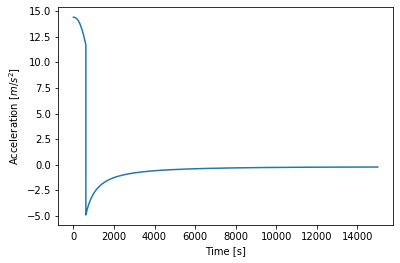

In [10]:
plt.plot(earth.t, earth.a)
plt.xlabel('Time [s]'); plt.ylabel(r'Acceleration $[m/s^2]$')
plt.show()

This is as I have designed for with a reasonable acceleration to reach the needed velocity and that it decreases as the gravity it needs to work against gets weaker. We clearly see the point at which the current is turned off and we only experience the pull of gravity.

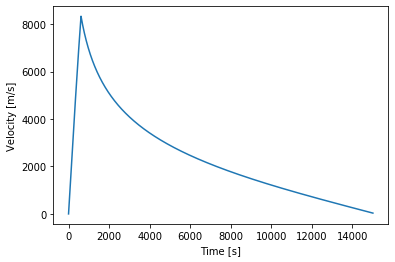

In [9]:
plt.plot(earth.t, earth.v)
plt.xlabel('Time [s]'); plt.ylabel('Velocity [m/s]')
plt.show()

Similar to on the moon only that we get a higher needed velocity and that the slowing down from the earths gravity is much steeper.

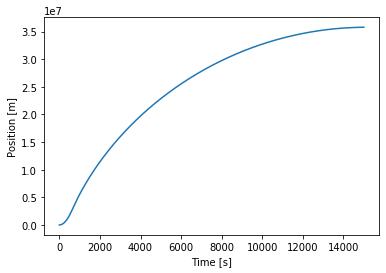

In [4]:
plt.plot(earth.t, earth.x)
plt.xlabel('Time [s]'); plt.ylabel('Position [m]')
plt.show()

Here we see it behaving pretty much like on the moon, only that the acceleration stage is more visible as the trip is much shorter.

# Would this be cheaper than convetional rockets?
Say this technology and infrastructure one day would be avaible, would it be cheaper than options we have today?
Currently the cheapest rocket provider on the market is SpaceX, with whom the price of getting 1kg to GEO is:
(converting from dollars to norwegian kroner 17.Nov)
- With the Falcon 9 rocket: $\approx$67912.6kr per kg.
- With the Falcon Heavy: $\approx$31328.9kr per kg.

*NOTE:* this is to get 1kg to a geosynchronus transfer orbit but for arguments sake we shall see it as the same as GEO.
(Prices calculated using data from [SpaceX](https://www.spacex.com/about/capabilities))

Looking aside from the costs of building this and just looking at what it would cost to run it once I will base myself on some simple calculations. I will find the Watt effect from: $W = IV$. To get the total current, I will simply integrate over all the current in our I_list variable weighted by our dt step. Then as we are dealing with a superconducting material it should be sufficient to plug our circuit to the norwegian power grid suplying a voltage of 230V. I then convert the total watts over the time the current was on to kWh and times it by the average kWh price for 2018. 42.5 øre per kWh.
(Average price per kWh gotten from [SSB](https://www.ssb.no/energi-og-industri/statistikker/elkraftpris))

Experimenting and running several simulations I noticed an interesting trend, that the price per kg dropped as we increased the mass. Below I have made a plot with the calculated price per kg and the corresponding masses.

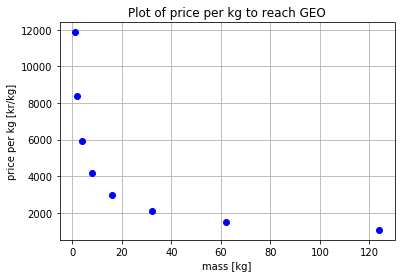

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Px = np.array([1, 2, 4, 8, 16, 32, 62, 124])
#Py = np.array([11859, 16771, 23718, 33543, 47437, 67086, 93379, 132058])
Py = np.array([11859, 8386, 5929, 4192, 2965, 2096, 1506, 1065])
points = np.array([Px, Py]) #Initialize array of data points

plt.figure()
plt.title('Plot of price per kg to reach GEO')
plt.plot(points[0], points[1], 'bo')
plt.xlabel('mass [kg]')
plt.ylabel('price per kg [kr/kg]')
plt.grid()
plt.show()

There appears to be a halfing of price as we quadrouple the mass, this is interesting but I have not been able to pinpoint the source of this relationship. This is absolutely a result worthy investigating, but it might simply be an artifact from this simpified model and not something one would observe in a real system.

But back to our question if it would be cheaper than rocketry, in this simplified system it's a clear yes. Even looking aside from the apparent trend that the system gets more economical the more mass we send up, even for the 1kg scenaro the price is about a third of sending something up with the Falcon Heavy. Also in fact we could make use of regenerative breaking on the elevator for when we send cargo down from space, to generate and win back spent electricity([4](https://en.wikipedia.org/wiki/Regenerative_brake)). But this is a seperate computational essay in itself I won't investigate.

# Things not taken into consideration:
Below is a list of some of the things that a more realistic model would have to account for that I have not:
- The coriolis effect working on our elevator.
- The meissner effect as we are dealing with superconductors.
- That there likely would have to be some resistance in the connecting bar(platform of our elevator).
- Friction between the platform and the cables.
- Air resistance in case we can't count on super long vacuum tubes.
- Induced emf working against the current.
- Tidal forces on the elevator.

# Conclusion:
This is of course a very idealized and simplified system but it gives some idea that it might not actually be such a stupid idea for getting things into space as long as could get over the hurdles of being able to build one. So in conclution yes one should be able to use the concept behind a rail gun to construct a feasable space elevator. 